In [152]:
import json
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # this is used for the plot the graph 
from numpy import median
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
from pylab import rcParams
from wordcloud import WordCloud
import matplotlib
from collections import Counter

In [153]:
#loads the movie dataset with release date
def load_tmdb_movies(path):
    file = pd.read_csv(path)
    file['release_date'] = pd.to_datetime(file['release_date']).apply(lambda x: x.date()) #convert to date time for us
    json_columns = ['genres', 'keywords', 'production_countries', 'production_companies', 'spoken_languages'] #these are json cols
    for column in json_columns:
        file[column] = file[column].apply(json.loads)
    return file

test = load_tmdb_movies("./tmdb-movie-metadata/tmdb_5000_movies.csv")
test.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",http://www.avatarmovie.com/,19995,"[{'id': 1463, 'name': 'culture clash'}, {'id':...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{'name': 'Ingenious Film Partners', 'id': 289...","[{'iso_3166_1': 'US', 'name': 'United States o...",2009-12-10,2787965087,162.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",http://disney.go.com/disneypictures/pirates/,285,"[{'id': 270, 'name': 'ocean'}, {'id': 726, 'na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{'name': 'Walt Disney Pictures', 'id': 2}, {'...","[{'iso_3166_1': 'US', 'name': 'United States o...",2007-05-19,961000000,169.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{'id': 470, 'name': 'spy'}, {'id': 818, 'name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{'name': 'Columbia Pictures', 'id': 5}, {'nam...","[{'iso_3166_1': 'GB', 'name': 'United Kingdom'...",2015-10-26,880674609,148.0,"[{'iso_639_1': 'fr', 'name': 'Français'}, {'is...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...",http://www.thedarkknightrises.com/,49026,"[{'id': 849, 'name': 'dc comics'}, {'id': 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{'name': 'Legendary Pictures', 'id': 923}, {'...","[{'iso_3166_1': 'US', 'name': 'United States o...",2012-07-16,1084939099,165.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",http://movies.disney.com/john-carter,49529,"[{'id': 818, 'name': 'based on novel'}, {'id':...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{'name': 'Walt Disney Pictures', 'id': 2}]","[{'iso_3166_1': 'US', 'name': 'United States o...",2012-03-07,284139100,132.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [154]:
def load_tmdb_credits(path):
    file = pd.read_csv(path)
    json_columns = ['cast', 'crew']
    for column in json_columns:
        file[column] = file[column].apply(json.loads)
    return file

test_credits = load_tmdb_credits("./tmdb-movie-metadata/tmdb_5000_credits.csv")
test_credits.head()

,movie_id,title,cast,crew
0,19995,Avatar,"[{'cast_id': 242, 'character': 'Jake Sully', '...","[{'credit_id': '52fe48009251416c750aca23', 'de..."
1,285,Pirates of the Caribbean: At World's End,"[{'cast_id': 4, 'character': 'Captain Jack Spa...","[{'credit_id': '52fe4232c3a36847f800b579', 'de..."
2,206647,Spectre,"[{'cast_id': 1, 'character': 'James Bond', 'cr...","[{'credit_id': '54805967c3a36829b5002c41', 'de..."
3,49026,The Dark Knight Rises,"[{'cast_id': 2, 'character': 'Bruce Wayne / Ba...","[{'credit_id': '52fe4781c3a36847f81398c3', 'de..."
4,49529,John Carter,"[{'cast_id': 5, 'character': 'John Carter', 'c...","[{'credit_id': '52fe479ac3a36847f813eaa3', 'de..."


In [155]:
#LOAD CSV's 
movies = load_tmdb_movies("./tmdb-movie-metadata/tmdb_5000_movies.csv")
credits = load_tmdb_credits("./tmdb-movie-metadata/tmdb_5000_credits.csv")


In [156]:
# THESE FUNCTIONS ARE IF WE NEED EXTRA FIELDS LATER from imdb ofc taken from https://www.kaggle.com/tanetboss/beginner-binary-classification-for-nice-movie/notebook#Ok-let-check-the-feature-importance
#GOAL to predict if a movie is nice before it releases 
LOST_COLUMNS = [
    'actor_1_facebook_likes',
    'actor_2_facebook_likes',
    'actor_3_facebook_likes',
    'aspect_ratio',
    'cast_total_facebook_likes',
    'color',
    'content_rating',
    'director_facebook_likes',
    'facenumber_in_poster',
    'movie_facebook_likes',
    'movie_imdb_link',
    'num_critic_for_reviews',
    'num_user_for_reviews'
                ]

# Columns in TMDb that had direct equivalents in the IMDB version. 
# These columns can be used with old kernels just by changing the names
TMDB_TO_IMDB_SIMPLE_EQUIVALENCIES = {
    'budget': 'budget',
    'genres': 'genres',
    'revenue': 'gross',
    'title': 'movie_title',
    'runtime': 'duration',
    'original_language': 'language',  # it's possible that spoken_languages would be a better match
    'keywords': 'plot_keywords',
    'vote_count': 'num_voted_users',
                                         }

IMDB_COLUMNS_TO_REMAP = {'imdb_score': 'vote_average'}


def safe_access(container, index_values):
    # return a missing value rather than an error upon indexing/key failure
    result = container
    try:
        for idx in index_values:
            result = result[idx]
        return result
    except IndexError or KeyError:
        return pd.np.nan


def get_director(crew_data):
    directors = [x['name'] for x in crew_data if x['job'] == 'Director']
    return safe_access(directors, [0])


def pipe_flatten_names(keywords):
    return '|'.join([x['name'] for x in keywords])


def convert_to_original_format(movies, credits):
    # Converts TMDb data to make it as compatible as possible with kernels built on the original version of the data.
    tmdb_movies = movies.copy()
    tmdb_movies.rename(columns=TMDB_TO_IMDB_SIMPLE_EQUIVALENCIES, inplace=True)
    tmdb_movies['title_year'] = pd.to_datetime(tmdb_movies['release_date']).apply(lambda x: x.year)
    # I'm assuming that the first production country is equivalent, but have not been able to validate this
    tmdb_movies['country'] = tmdb_movies['production_countries'].apply(lambda x: safe_access(x, [0, 'name']))
    tmdb_movies['language'] = tmdb_movies['spoken_languages'].apply(lambda x: safe_access(x, [0, 'name']))
    tmdb_movies['director_name'] = credits['crew'].apply(get_director)
    tmdb_movies['actor_1_name'] = credits['cast'].apply(lambda x: safe_access(x, [0, 'name']))
    tmdb_movies['actor_2_name'] = credits['cast'].apply(lambda x: safe_access(x, [1, 'name']))
    tmdb_movies['actor_3_name'] = credits['cast'].apply(lambda x: safe_access(x, [2, 'name']))
    tmdb_movies['companies_1'] = tmdb_movies['production_companies'].apply(lambda x: safe_access(x, [0, 'name']))
    tmdb_movies['companies_2'] = tmdb_movies['production_companies'].apply(lambda x: safe_access(x, [1, 'name']))
    tmdb_movies['companies_3'] = tmdb_movies['production_companies'].apply(lambda x: safe_access(x, [2, 'name']))
    tmdb_movies['genres'] = tmdb_movies['genres'].apply(pipe_flatten_names)
    tmdb_movies['plot_keywords'] = tmdb_movies['plot_keywords'].apply(pipe_flatten_names)
    return tmdb_movies

In [157]:
pretreated_data = convert_to_original_format(movies, credits)
pretreated_data.head()

,budget,genres,homepage,id,plot_keywords,language,original_title,overview,popularity,production_companies,...,num_voted_users,title_year,country,director_name,actor_1_name,actor_2_name,actor_3_name,companies_1,companies_2,companies_3
0,237000000,Action|Adventure|Fantasy|Science Fiction,http://www.avatarmovie.com/,19995,culture clash|future|space war|space colony|so...,English,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{'name': 'Ingenious Film Partners', 'id': 289...",...,11800,2009.0,United States of America,James Cameron,Sam Worthington,Zoe Saldana,Sigourney Weaver,Ingenious Film Partners,Twentieth Century Fox Film Corporation,Dune Entertainment
1,300000000,Adventure|Fantasy|Action,http://disney.go.com/disneypictures/pirates/,285,ocean|drug abuse|exotic island|east india trad...,English,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{'name': 'Walt Disney Pictures', 'id': 2}, {'...",...,4500,2007.0,United States of America,Gore Verbinski,Johnny Depp,Orlando Bloom,Keira Knightley,Walt Disney Pictures,Jerry Bruckheimer Films,Second Mate Productions
2,245000000,Action|Adventure|Crime,http://www.sonypictures.com/movies/spectre/,206647,spy|based on novel|secret agent|sequel|mi6|bri...,Français,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{'name': 'Columbia Pictures', 'id': 5}, {'nam...",...,4466,2015.0,United Kingdom,Sam Mendes,Daniel Craig,Christoph Waltz,Léa Seydoux,Columbia Pictures,Danjaq,B24
3,250000000,Action|Crime|Drama|Thriller,http://www.thedarkknightrises.com/,49026,dc comics|crime fighter|terrorist|secret ident...,English,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{'name': 'Legendary Pictures', 'id': 923}, {'...",...,9106,2012.0,United States of America,Christopher Nolan,Christian Bale,Michael Caine,Gary Oldman,Legendary Pictures,Warner Bros.,DC Entertainment
4,260000000,Action|Adventure|Science Fiction,http://movies.disney.com/john-carter,49529,based on novel|mars|medallion|space travel|pri...,English,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{'name': 'Walt Disney Pictures', 'id': 2}]",...,2124,2012.0,United States of America,Andrew Stanton,Taylor Kitsch,Lynn Collins,Samantha Morton,Walt Disney Pictures,NaN,NaN


In [158]:
#cleaning up missing data and irrelevant fields aka just hompage rn 
#the following is just to show which columns have null values 

# total = data.isnull().sum().sort_values(ascending=False)
# percent = (data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)
# missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
# missing_data.head(5)
pretreated_data.drop(['homepage'], axis=1, inplace=True)

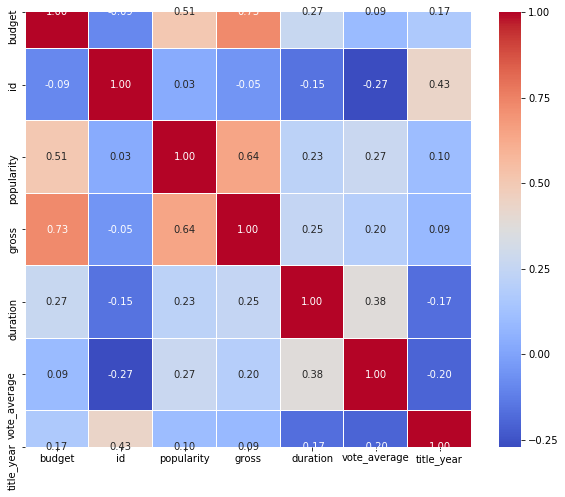

In [159]:
#dropping irel features 2 
pretreated_data.drop(['num_voted_users'], axis=1, inplace=True)
#correlation matrix with numerical values 
plt.figure(figsize = (10,8))
g = sns.heatmap(pretreated_data[list(pretreated_data)].corr(),annot=True, fmt = ".2f", cmap = "coolwarm",linewidths= 0.01)

In [160]:
#title year and vote average + duration cleaup 
pretreated_data = pretreated_data[pretreated_data['vote_average'] != 0]
pretreated_data = pretreated_data[pretreated_data['duration'] != 0]
pretreated_data.columns


Index(['budget', 'genres', 'id', 'plot_keywords', 'language', 'original_title',
       'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'gross', 'duration',
       'spoken_languages', 'status', 'tagline', 'movie_title', 'vote_average',
       'title_year', 'country', 'director_name', 'actor_1_name',
       'actor_2_name', 'actor_3_name', 'companies_1', 'companies_2',
       'companies_3'],
      dtype='object')

In [161]:
#Commericial Success Test 
#not possible to have 0 gross and 0 budget i guess?
# data = data[data['gross'] != 0]
# data = data[data['budget'] != 0]
# data['Commericial success'] = data['gross'] > data['budget']

# data['Success'] = [1 if (data['gross'][i] > data['budget'][i]) else 0 for i in range(0,len(data['gross']))]
# for i in range(0, len(data['gross'])): 
#     print(int(data['budget'][i]))
#     if (int(data['gross'][i]) > int(data['budget'][i])): 
#         data['Success'] = 1 
#     else: 
#         data['Success'] = 0

# data.loc[:, ['Success', 'gross', 'budget']]

In [162]:
#Popularity Success 
popularity_data = pretreated_data.copy()
popularity_data['Popularity Success'] = popularity_data['popularity'].map(lambda s :1  if s >= popularity_data['popularity'].mean() else 0) 

In [163]:
rcParams['figure.figsize'] = 13,10


In [164]:
popularity_data['Popularity Success'].value_counts(sort = False)


0    3145
1    1572
Name: Popularity Success, dtype: int64

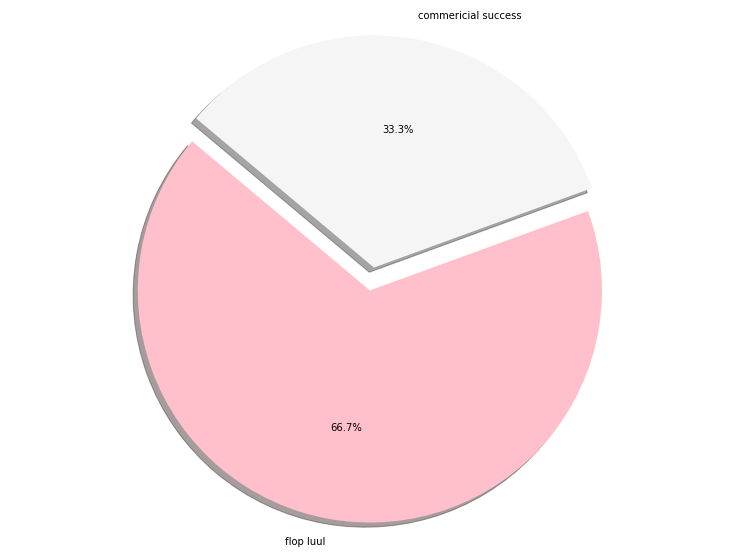

In [165]:
labels =["flop luul","commericial success"]
sizes = popularity_data['Popularity Success'].value_counts(sort = False)
colors = ["pink","whitesmoke"]
explode = (0.1,0)  # explode 1st slice
 
# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140,)
plt.axis('equal')
plt.show()

In [166]:
#convert budget into 1's and 0's time: 
import statistics
sd = statistics.stdev(popularity_data.budget)
mean = popularity_data.budget.mean()
max = popularity_data.budget.max()
min = popularity_data.budget.min()

#these are def arbitrarly set 
popularity_data['VeryLowBud'] = popularity_data['budget'].map(lambda s: 1 if s < 10000000 else 0)
popularity_data['LowBud'] = popularity_data['budget'].map(lambda s: 1 if 10000000 <= s < mean else 0)
popularity_data['MedBud'] = popularity_data['budget'].map(lambda s: 1 if  mean <= s < mean+sd  else 0)
popularity_data['HighBud'] = popularity_data['budget'].map(lambda s: 1 if mean+sd <= s < 100000000 else 0)
popularity_data['VeryHighBud'] = popularity_data['budget'].map(lambda s: 1 if s >= 100000000 else 0)

In [167]:
popularity_data.head()

,budget,genres,id,plot_keywords,language,original_title,overview,popularity,production_companies,production_countries,...,actor_3_name,companies_1,companies_2,companies_3,Popularity Success,VeryLowBud,LowBud,MedBud,HighBud,VeryHighBud
0,237000000,Action|Adventure|Fantasy|Science Fiction,19995,culture clash|future|space war|space colony|so...,English,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{'name': 'Ingenious Film Partners', 'id': 289...","[{'iso_3166_1': 'US', 'name': 'United States o...",...,Sigourney Weaver,Ingenious Film Partners,Twentieth Century Fox Film Corporation,Dune Entertainment,1,0,0,0,0,1
1,300000000,Adventure|Fantasy|Action,285,ocean|drug abuse|exotic island|east india trad...,English,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{'name': 'Walt Disney Pictures', 'id': 2}, {'...","[{'iso_3166_1': 'US', 'name': 'United States o...",...,Keira Knightley,Walt Disney Pictures,Jerry Bruckheimer Films,Second Mate Productions,1,0,0,0,0,1
2,245000000,Action|Adventure|Crime,206647,spy|based on novel|secret agent|sequel|mi6|bri...,Français,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{'name': 'Columbia Pictures', 'id': 5}, {'nam...","[{'iso_3166_1': 'GB', 'name': 'United Kingdom'...",...,Léa Seydoux,Columbia Pictures,Danjaq,B24,1,0,0,0,0,1
3,250000000,Action|Crime|Drama|Thriller,49026,dc comics|crime fighter|terrorist|secret ident...,English,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{'name': 'Legendary Pictures', 'id': 923}, {'...","[{'iso_3166_1': 'US', 'name': 'United States o...",...,Gary Oldman,Legendary Pictures,Warner Bros.,DC Entertainment,1,0,0,0,0,1
4,260000000,Action|Adventure|Science Fiction,49529,based on novel|mars|medallion|space travel|pri...,English,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{'name': 'Walt Disney Pictures', 'id': 2}]","[{'iso_3166_1': 'US', 'name': 'United States o...",...,Samantha Morton,Walt Disney Pictures,NaN,NaN,1,0,0,0,0,1


In [168]:
popularity_data.columns

Index(['budget', 'genres', 'id', 'plot_keywords', 'language', 'original_title',
       'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'gross', 'duration',
       'spoken_languages', 'status', 'tagline', 'movie_title', 'vote_average',
       'title_year', 'country', 'director_name', 'actor_1_name',
       'actor_2_name', 'actor_3_name', 'companies_1', 'companies_2',
       'companies_3', 'Popularity Success', 'VeryLowBud', 'LowBud', 'MedBud',
       'HighBud', 'VeryHighBud'],
      dtype='object')

In [169]:
#duration 
popularity_data = popularity_data[np.isfinite(popularity_data['duration'])]
popularity_data['ShortMovie'] = popularity_data['duration'].map(lambda s: 1 if s < 90 else 0)
popularity_data['NotTooLongMovie'] = popularity_data['duration'].map(lambda s: 1 if 90 <= s < 120 else 0)
popularity_data['LongMovie'] = popularity_data['duration'].map(lambda s: 1 if   s >= 120  else 0)
popularity_data.columns

Index(['budget', 'genres', 'id', 'plot_keywords', 'language', 'original_title',
       'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'gross', 'duration',
       'spoken_languages', 'status', 'tagline', 'movie_title', 'vote_average',
       'title_year', 'country', 'director_name', 'actor_1_name',
       'actor_2_name', 'actor_3_name', 'companies_1', 'companies_2',
       'companies_3', 'Popularity Success', 'VeryLowBud', 'LowBud', 'MedBud',
       'HighBud', 'VeryHighBud', 'ShortMovie', 'NotTooLongMovie', 'LongMovie'],
      dtype='object')

In [170]:
popularity_data.drop(['id','budget','original_title','overview','spoken_languages','production_companies','production_countries','release_date','status',
          'tagline','movie_title','vote_average','language','director_name','actor_1_name','actor_2_name','actor_3_name',
          'companies_1','companies_2','companies_3','country','genres','duration','plot_keywords','popularity','gross','title_year'], axis=1, inplace=True)
popularity_data.columns

Index(['Popularity Success', 'VeryLowBud', 'LowBud', 'MedBud', 'HighBud',
       'VeryHighBud', 'ShortMovie', 'NotTooLongMovie', 'LongMovie'],
      dtype='object')

In [171]:
popularity_data.head()

,Popularity Success,VeryLowBud,LowBud,MedBud,HighBud,VeryHighBud,ShortMovie,NotTooLongMovie,LongMovie
0,1,0,0,0,0,1,0,0,1
1,1,0,0,0,0,1,0,0,1
2,1,0,0,0,0,1,0,0,1
3,1,0,0,0,0,1,0,0,1
4,1,0,0,0,0,1,0,0,1


In [172]:
popularity_data['is_train'] = np.random.uniform(0, 1, len(popularity_data)) <= .75
popularity_data

,Popularity Success,VeryLowBud,LowBud,MedBud,HighBud,VeryHighBud,ShortMovie,NotTooLongMovie,LongMovie,is_train
0,1,0,0,0,0,1,0,0,1,False
1,1,0,0,0,0,1,0,0,1,False
2,1,0,0,0,0,1,0,0,1,True
3,1,0,0,0,0,1,0,0,1,True
4,1,0,0,0,0,1,0,0,1,True
...,...,...,...,...,...,...,...,...,...,...
4798,0,1,0,0,0,0,1,0,0,False
4799,0,1,0,0,0,0,1,0,0,False
4800,0,1,0,0,0,0,0,0,1,True
4801,0,1,0,0,0,0,0,1,0,True


In [173]:
train, test = popularity_data[popularity_data['is_train']==True], popularity_data[popularity_data['is_train']==False]
train.drop(['is_train'], axis=1, inplace=True)
test.drop(['is_train'], axis=1, inplace=True)

train["Popularity Success"] = train["Popularity Success"].astype(int)

Y_train = train["Popularity Success"]
X_train = train.drop(labels = ["Popularity Success"],axis = 1)
Y_test = test["Popularity Success"]
X_test = test.drop(labels = ["Popularity Success"],axis = 1)


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [174]:
print(len(train))


3560


In [175]:
print(len(test))

1156


In [176]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf.fit(X_train, Y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [177]:
from sklearn.model_selection import  cross_val_score

c_dec = cross_val_score(clf, X_train, Y_train, cv=10)
c_dec.mean()

0.6394760721189885

In [178]:
result = clf.predict_proba(X_test)[:]
test_result = np.asarray(Y_test)

Dec_result = pd.DataFrame(result[:,1])
Dec_result['Predict'] = Dec_result[0].map(lambda s: 1 if s >= 0.6  else 0)
Dec_result['testAnswer'] = pd.DataFrame(test_result)

Dec_result['Correct'] = np.where((Dec_result['Predict'] == Dec_result['testAnswer'])
                     , 1, 0)
Dec_result.head()

,0,Predict,testAnswer,Correct
0,0.903509,1,1,1
1,0.903509,1,1,1
2,0.903509,1,1,1
3,0.903509,1,1,1
4,0.903509,1,1,1
